# Minimum Euclidean Distance Classifier
The minimum distance classifier is used to classify unknown data to classes which minimize the distance between the data and the class in multi-feature space. The distance is defined as an index of similarity so that the minimum distance is identical to the maximum similarity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Train Model
The learning of our data consists of the following:   
*   We split our dataset into subsets corresponding to each label y.
*   For each subset, we estimate the mean and covariance.

In [2]:
def train_model(dataset):
  grouped = dataset.groupby(['Class'])
  feature_columns = dataset.columns[dataset.columns != 'Class']
  params = dict()
  for name, group in grouped:
    samples = group[feature_columns]
    params[name] = {'cov': samples.cov(),
                    'mean': samples.mean()}
  return params

## Classifier
When making a prediction on a new data vector x:
*   We calculate the Mahalanobis distance of the new data with the average of each class.
*   Return the label of the class with the shortest distance to the new data .


In [3]:
def classify(dataset, params):
  predicted_labels = np.empty(len(dataset))
  for index, row in dataset.iterrows(): 
    classifieds = list()
    for idx, param in params.items():
      distance = get_distance(row, param['mean'], param['cov'])
      classifieds.append(distance)
    min_dis_idx = np.argmin(classifieds)
    predicted_label = min_dis_idx + 1
    predicted_labels[index] = predicted_label
  return predicted_labels

## Mahalanobis Distance
Mahalanobis distance is an effective multivariate distance metric that measures the distance between a point (vector) and a distribution.
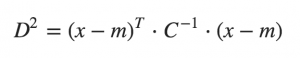


*   D^2 is the square of the Mahalanobis distance.
*   x is the vector of the observation (row in a dataset),
*   m is the vector of mean values of independent variables (mean of each column),
*   C^(-1) is the inverse covariance matrix of independent variables.

In [4]:
def get_distance(x, mean, covariance):
  return np.sqrt((x - mean).T @ np.linalg.inv(covariance) @ (x - mean))

## Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

In [5]:
def get_confusion_matrix(class_labels, predicted_labels):
  labels = class_labels.unique()
  confusion_matrix = dict()
  for class_label in labels:
    p_labels = predicted_labels[class_labels == class_label]
    confusion_matrix[class_label] = list()
    for predicted_label in labels:
      confusion_matrix[class_label].append((p_labels == predicted_label).sum())
  return pd.DataFrame(confusion_matrix, index=range(1, len(labels) + 1))

In [6]:
#return accuracy of classifier [Total, Class 1, Class 2, ...]
def evaluate_model(confusion_matrix):
  accuracy = [np.diag(confusion_matrix).sum() / confusion_matrix.sum().sum()]
  for label in range(1, confusion_matrix.shape[0] + 1):
    accuracy.append(confusion_matrix[label][label] / confusion_matrix[label].sum())
  return accuracy

# Sample Dataset 
2 classes with 2 features that are normally distributed 

In [7]:
n_data = 500
# First class
mean = [0, 0]
cov = [[1, 0.5], [0.5, 2]]
first_class = np.random.multivariate_normal(mean, cov, n_data)
first_class = np.c_[first_class, np.ones(first_class.shape[0])]
# Second class
mean = [3, 3]
cov = [[2, -1], [-1, 1]]
second_class = np.random.multivariate_normal(mean, cov, n_data)
second_class = np.c_[second_class, np.ones(second_class.shape[0]) * 2]
# Create dataset
dataset = pd.DataFrame(np.vstack((first_class, second_class)))
dataset.columns = ['Feature 1', 'Feature 2', 'Class']
dataset.head()

,Feature 1,Feature 2,Class
0,-0.367384,-0.751734,1.0
1,2.604594,1.857425,1.0
2,0.548589,2.889564,1.0
3,-0.213967,1.190141,1.0
4,0.151037,1.489777,1.0


## Plot Dataset

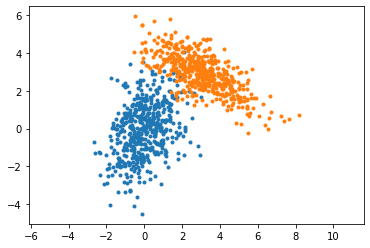

In [8]:
grouped = dataset.groupby(['Class'])
for name, group in grouped:
  plt.plot(group['Feature 1'], group['Feature 2'], '.')

plt.axis('equal');

## Train & Classification
All data is used to train model

In [9]:
params = train_model(dataset)

In [10]:
feature_columns = dataset.columns[dataset.columns != 'Class']
samples = dataset.loc[:, feature_columns]
predicted_labels = classify(samples, params)

## Confustion Matrix

In [11]:
confusion_matrix = get_confusion_matrix(dataset['Class'], predicted_labels)
print('Rows is predicted labels and Columns is true labels')
confusion_matrix

Rows is predicted labels and Columns is true labels


,1.0,2.0
1,487,8
2,13,492


In [12]:
accuracies = evaluate_model(confusion_matrix)
print(f'Total Accuracy {accuracies[0]:.0%}')
for idx, accuracy in enumerate(accuracies[1:]):
  print(f'Accuracy Class {idx+1} {accuracy:.0%}')

Total Accuracy 98%
Accuracy Class 1 97%
Accuracy Class 2 98%


# Haberman's Survival Data

Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

Missing Attribute Values: None

In [13]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Recognition/Dataset/Haberman/haberman.data', sep=',', header=None)
dataset.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Class']
dataset.head()

,Feature 1,Feature 2,Feature 3,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Plot Dataset

In [14]:
grouped = dataset.groupby('Class')

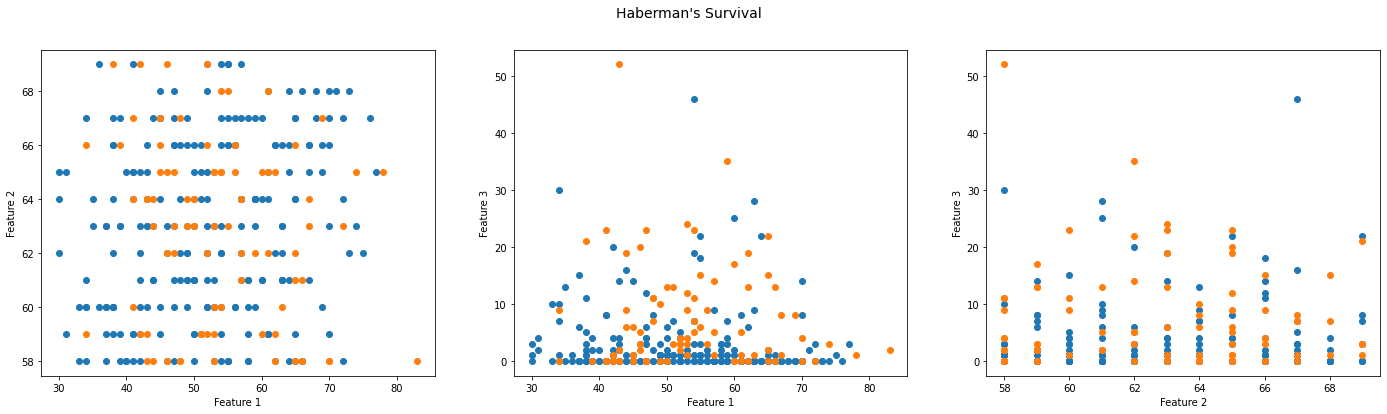

In [15]:
fig = plt.figure(figsize=(24, 6))
plt.suptitle("Haberman's Survival", fontsize=14)

ax = fig.add_subplot(131)
for name, group in grouped:
  ax.scatter(group['Feature 1'], group['Feature 2']);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

ax = fig.add_subplot(132)
for name, group in grouped:
  ax.scatter(group['Feature 1'], group['Feature 3']);
plt.xlabel('Feature 1')
plt.ylabel('Feature 3');

ax = fig.add_subplot(133)
for name, group in grouped:
  ax.scatter(group['Feature 2'], group['Feature 3']);
plt.xlabel('Feature 2')
plt.ylabel('Feature 3');

In [16]:
fig = px.scatter_3d(x=dataset['Feature 1'], y=dataset['Feature 2'], z=dataset['Feature 3'], color=dataset['Class'].astype(str),
                    labels={'x': "Feature 1", 'y': "Feature 2", 'z': "Feature 3"})
fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

## Train & Classification
All data is used to train model

In [17]:
params = train_model(dataset)

In [18]:
feature_columns = dataset.columns[dataset.columns != 'Class']
samples = dataset.loc[:, feature_columns]
predicted_labels = classify(samples, params)

## Confustion Matrix

In [19]:
confusion_matrix = get_confusion_matrix(dataset['Class'], predicted_labels)
print('Rows is predicted labels and Columns is true labels')
confusion_matrix

Rows is predicted labels and Columns is true labels


,1,2
1,160,30
2,65,51


In [20]:
accuracies = evaluate_model(confusion_matrix)
print(f'Total Accuracy {accuracies[0]:.0%}')
for idx, accuracy in enumerate(accuracies[1:]):
  print(f'Accuracy Class {idx+1} {accuracy:.0%}')

Total Accuracy 69%
Accuracy Class 1 71%
Accuracy Class 2 63%


# User Modeling Dataset 
4 classes with 5 features that are normally distributed 

In [21]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Recognition/Dataset/Data_User_Modeling_Dataset.txt', sep='	', header=None)
dataset.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Class']
dataset.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Class
0,0.08,0.08,0.10,0.24,0.90,1
1,0.06,0.06,0.05,0.25,0.33,2
2,0.10,0.10,0.15,0.65,0.30,3
3,0.08,0.08,0.08,0.98,0.24,2
4,0.09,0.15,0.40,0.10,0.66,3


In [22]:
dataset['Class'].unique()

array([1, 2, 3, 4])

## Train & Classification
All data is used to train model

In [23]:
params = train_model(dataset)

In [24]:
feature_columns = dataset.columns[dataset.columns != 'Class']
samples = dataset.loc[:, feature_columns]
predicted_labels = classify(samples, params)

## Confustion Matrix

In [25]:
confusion_matrix = get_confusion_matrix(dataset['Class'], predicted_labels)
print('Rows is predicted labels and Columns is true labels')
confusion_matrix

Rows is predicted labels and Columns is true labels


,1,2,3,4
1,62,0,1,0
2,0,81,4,2
3,1,0,83,0
4,0,2,0,21


In [26]:
accuracies = evaluate_model(confusion_matrix)
print(f'Total Accuracy {accuracies[0]:.0%}')
for idx, accuracy in enumerate(accuracies[1:]):
  print(f'Accuracy Class {idx+1} {accuracy:.0%}')

Total Accuracy 96%
Accuracy Class 1 98%
Accuracy Class 2 98%
Accuracy Class 3 94%
Accuracy Class 4 91%
